In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder

In [141]:
data = pd.read_excel('excel/bahan_knn_new/DATA_KNN_6000x1800_NEW.xlsx')
hasil_real = pd.read_excel('hasil_real.xlsx')
x = data[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
y = data['KECEMASAN']

x_real = hasil_real[['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
y_real = hasil_real['KECEMASAN']

In [142]:
minmax = MinMaxScaler()
x_minmax = minmax.fit_transform(x)
x_minmax = pd.DataFrame(x_minmax)
# x_minmax
# y


minmax = MinMaxScaler()
x_minmax_real = minmax.fit_transform(x_real)
x_minmax_real = pd.DataFrame(x_minmax_real)
# x_minmax_real
# y_real

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x_minmax,y,test_size=0.2,random_state=20)
x_train_real,x_test_real,y_train_real,y_test_real = train_test_split(x_minmax_real,y_real,test_size=0.2,random_state=20)

In [144]:
array_akurasi_train = []
array_akurasi_test = []
array_presisi_train = []
array_presisi_test = []
array_recall_train = []
array_recall_test = []
array_akurasi_test_real = []
array_presisi_test_real = []
array_recall_test_real = []
for i in range(1,51):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_pred_real = model.predict(x_train_real)
    test_pred_real = model.predict(x_test_real)

    array_akurasi_train.append(accuracy_score(y_train,train_pred))
    array_akurasi_test.append(accuracy_score(y_test,test_pred))
    array_presisi_train.append(precision_score(y_train,train_pred,average='weighted'))
    array_presisi_test.append(precision_score(y_test,test_pred,average='weighted'))
    array_recall_train.append(recall_score(y_train,train_pred,average='weighted'))
    array_recall_test.append(recall_score(y_test,test_pred,average='weighted'))

    array_akurasi_test_real.append(accuracy_score(y_test_real,test_pred_real))
    array_presisi_test_real.append(precision_score(y_test_real,test_pred_real,average='weighted'))
    array_recall_test_real.append(recall_score(y_test_real,test_pred_real,average='weighted'))


C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-de

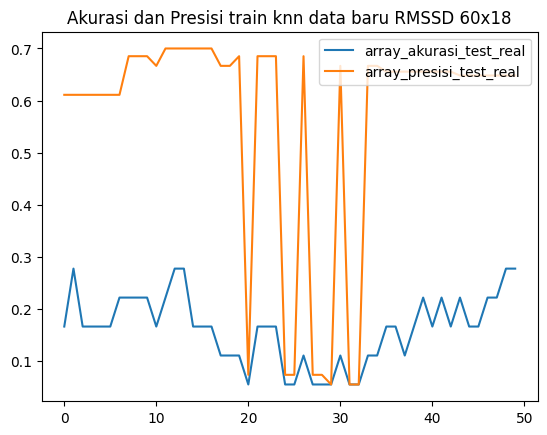

In [145]:
array_akurasi_train = pd.DataFrame(array_akurasi_train)
array_akurasi_test = pd.DataFrame(array_akurasi_test)
array_presisi_train = pd.DataFrame(array_presisi_train)
array_presisi_test = pd.DataFrame(array_presisi_test)
array_recall_train = pd.DataFrame(array_recall_train)
array_recall_test = pd.DataFrame(array_recall_test)
array_akurasi_test_real = pd.DataFrame(array_akurasi_test_real)
array_presisi_test_real = pd.DataFrame(array_presisi_test_real)
array_recall_test_real = pd.DataFrame(array_recall_test_real)
plt.title('Akurasi dan Presisi train knn 18x18')

nomor = pd.DataFrame(np.arange(0,50))

# plt.figure(facecolor="white", figsize= (7,7))
# ax = plt.axes()
# ax.set_facecolor("white")
# plt.plot(array_akurasi_train, label = 'array_akurasi_train')
# plt.plot(array_presisi_train, label = 'array_presisi_train')
# plt.plot(array_akurasi_test, label = 'array_akurasi_test')
# plt.plot(array_presisi_test, label = 'array_presisi_test')

plt.plot(array_akurasi_test_real, label = 'array_akurasi_test_real')
plt.plot(array_presisi_test_real, label = 'array_presisi_test_real')
# plt.plot(array_recall_train)
# plt.plot(array_recall_test)
plt.title('Akurasi dan Presisi train knn data baru RMSSD 60x18')
plt.legend(loc = 'upper right')
plt.show()


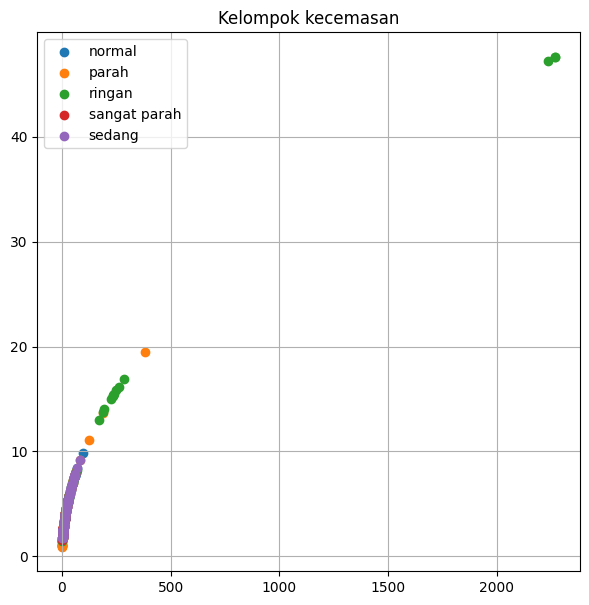

In [146]:
fig,ax = plt.subplots(figsize=(7,7))
for kec,d in data.groupby('KECEMASAN'):
    # ax.scatter(d['BPM'],d['RMSSD'],label=kec)
    ax.scatter(d['VAR'],d['STD'],label=kec)
    # ax.scatter(d['SISTOL'],d['DIASTOL'],label=kec)


plt.legend(loc = 'upper left')
plt.title('Kelompok kecemasan')
plt.grid(True)
plt.show()

# ['BPM','RMSSD','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
